In [1]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(center=(39.3327459, -76.62337004), zoom=9)

dark_matter_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR)
m.add_layer(dark_matter_layer)
m

Map(center=[39.3327459, -76.62337004], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

In [2]:
!wget https://archive.stsci.edu/pub/hlsp/angst/acs/hlsp_angst_hst_acs-wfc_10210-ugc9128_f814w_v1_ref.fits -O test.fits

--2020-12-08 15:40:20--  https://archive.stsci.edu/pub/hlsp/angst/acs/hlsp_angst_hst_acs-wfc_10210-ugc9128_f814w_v1_ref.fits
Resolving archive.stsci.edu (archive.stsci.edu)... 130.167.252.39
Connecting to archive.stsci.edu (archive.stsci.edu)|130.167.252.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71418240 (68M) [allicashion/octet-stream]
Saving to: ‘test.fits’

test.fits           100%[===================>]  68.11M  14.1MB/s    in 4.9s    

2020-12-08 15:40:25 (13.9 MB/s) - ‘test.fits’ saved [71418240/71418240]



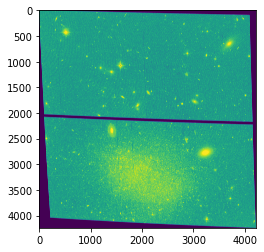

In [67]:
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy import visualization

f = fits.open('test.fits')

siv = visualization.LogStretch() + visualization.AsymmetricPercentileInterval(15, 99.5)

plt.imshow(siv(f[0].data))

At another terminal in this directory run `uvicorn tile_server:app`

In [43]:
import requests

res = requests.get('http://127.0.0.1:8000/loadfits/test.fits/0')
res, res.text

(<Response [200]>, '"fits_test.fits_0_1"')

In [44]:
hsh = res.json()
x = 1
y = 3
res2 = requests.get(f'http://127.0.0.1:8000/tile/{hsh}/1/{x}/{y}.png')
res2.status_code, 'OK' if res2.ok else res2.text

(200, 'OK')

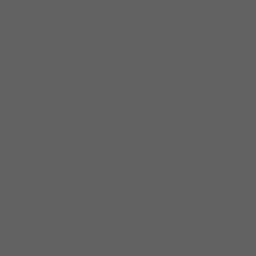

In [22]:
from IPython import display

display.display_png(res2.content, raw=True)

In [221]:
import ipyleaflet

hsh = requests.get('http://127.0.0.1:8000/loadfits/test.fits/0').json()
l = ipyleaflet.TileLayer(url='http://127.0.0.1:8000/tile/'+hsh+'/{z}/{x}/{y}.png')

xys = np.mgrid[0:5, 0:5].reshape(2, 25).T*256
mc = ipyleaflet.MarkerCluster(markers=[ipyleaflet.Marker(location=(x,y), title=str((x,y))) for x,y in xys])

m = ipyleaflet.Map(layers=[l, mc], crs=ipyleaflet.projections.Simple, zoom=0)
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

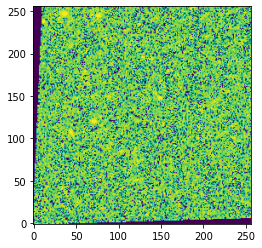

In [225]:
x = 0
y = 0
TILE_SIZE=256

plt.imshow(siv(f[0].data[y:y+TILE_SIZE, x:x+TILE_SIZE]), origin='lower')

(0.0, 512.0)

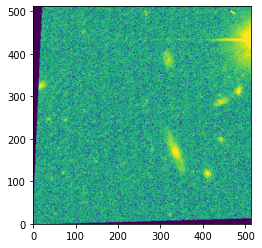

In [191]:
plt.imshow(siv(f[0].data), origin='lower')
plt.xlim(0, 256*2)
plt.ylim(0, 256*2)